In [6]:
import numpy as np

# parameters
S0 = 100      # initial stock price
K = 100       # strike price
r = 0.05      # risk-free rate
sigma = 0.2   # volatility
T = 1.0       # time to maturity (years)
N = 10000     # number of Monte Carlo simulations

# simulate standard normal samples
Z = np.random.randn(N)

# Geometric Brownian Motion terminal stock prices
ST = S0 * np.exp((r - 0.5 * sigma**2)*T + sigma*np.sqrt(T)*Z)

# payoff of a European call option
payoffs = np.maximum(ST - K, 0)

# discounted Monte Carlo price
price_mc = np.exp(-r*T) * np.mean(payoffs)

price_mc


np.float64(10.320837787980862)

In [7]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

price_bs = black_scholes_call(S0, K, r, sigma, T)
price_bs


np.float64(10.450583572185565)

In [8]:
print("Monte Carlo Price:", price_mc)
print("Black-Scholes Price:", price_bs)
print("Absolute Error:", abs(price_mc - price_bs))


Monte Carlo Price: 10.320837787980862
Black-Scholes Price: 10.450583572185565
Absolute Error: 0.12974578420470273


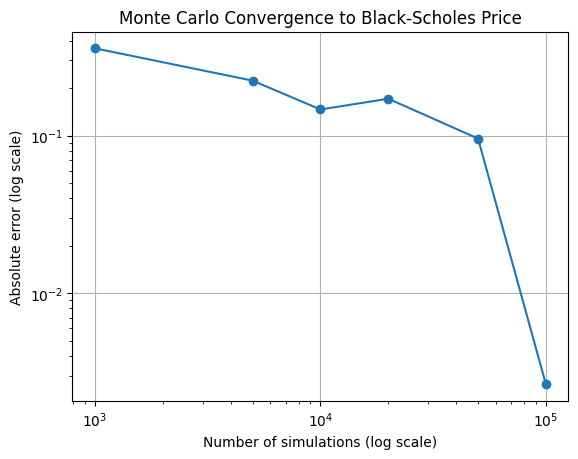

In [9]:
import matplotlib.pyplot as plt

Ns = [1000, 5000, 10000, 20000, 50000, 100000]
errors = []

for N in Ns:
    Z = np.random.randn(N)
    ST = S0 * np.exp((r - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)
    payoffs = np.maximum(ST - K, 0)
    price_mc_N = np.exp(-r*T) * np.mean(payoffs)
    errors.append(abs(price_mc_N - price_bs))

plt.plot(Ns, errors, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of simulations (log scale)")
plt.ylabel("Absolute error (log scale)")
plt.title("Monte Carlo Convergence to Black-Scholes Price")
plt.grid(True)
plt.show()


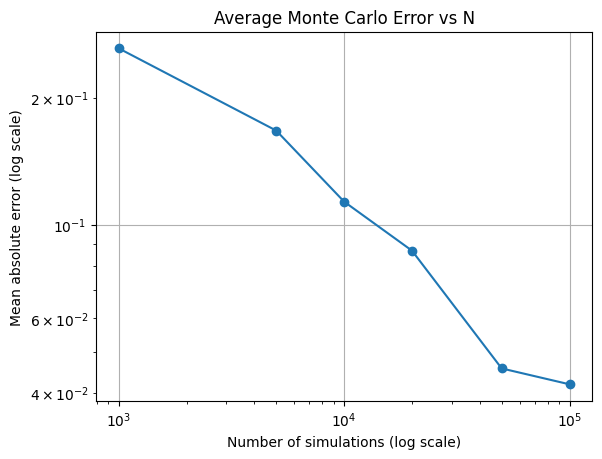

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Ns = [1000, 5000, 10000, 20000, 50000, 100000]
mean_errors = []

num_repeats = 20  # how many times to repeat MC for each N

for N in Ns:
    errors_N = []
    for _ in range(num_repeats):
        Z = np.random.randn(N)
        ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
        payoffs = np.maximum(ST - K, 0)
        price_mc_N = np.exp(-r * T) * np.mean(payoffs)
        errors_N.append(abs(price_mc_N - price_bs))
    mean_errors.append(np.mean(errors_N))

plt.plot(Ns, mean_errors, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of simulations (log scale)")
plt.ylabel("Mean absolute error (log scale)")
plt.title("Average Monte Carlo Error vs N")
plt.grid(True)
plt.show()


In [11]:
def mc_call_basic(N, S0, K, r, sigma, T):
    Z = np.random.randn(N)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    payoffs = np.maximum(ST - K, 0)
    return np.exp(-r * T) * np.mean(payoffs)



In [12]:
def mc_call_antithetic(N, S0, K, r, sigma, T):
    Z = np.random.randn(N)

    ST_plus  = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    ST_minus = S0 * np.exp((r - 0.5 * sigma**2) * T - sigma * np.sqrt(T) * Z)

    payoff_plus  = np.maximum(ST_plus  - K, 0)
    payoff_minus = np.maximum(ST_minus - K, 0)

    payoff_avg = 0.5 * (payoff_plus + payoff_minus)

    return np.exp(-r * T) * np.mean(payoff_avg)



In [13]:
def compare_variances(N, runs=50):
    basic_errors = []
    anti_errors  = []

    for _ in range(runs):
        basic_price = mc_call_basic(N, S0, K, r, sigma, T)
        anti_price  = mc_call_antithetic(N, S0, K, r, sigma, T)

        basic_errors.append(basic_price - price_bs)
        anti_errors.append(anti_price - price_bs)

    return np.std(basic_errors), np.std(anti_errors)

std_basic, std_anti = compare_variances(10000, runs=50)
std_basic, std_anti


(np.float64(0.14285107178905632), np.float64(0.07765518916620992))

In [14]:
def variance_vs_N(N_values, runs=50):
    std_basic_list = []
    std_anti_list = []

    for N in N_values:
        basic_errors = []
        anti_errors = []

        for _ in range(runs):
            basic_price = mc_call_basic(N, S0, K, r, sigma, T)
            anti_price  = mc_call_antithetic(N, S0, K, r, sigma, T)

            basic_errors.append(basic_price - price_bs)
            anti_errors.append(anti_price - price_bs)

        std_basic_list.append(np.std(basic_errors))
        std_anti_list.append(np.std(anti_errors))

    return std_basic_list, std_anti_list

# Choose N values for the experiment
N_values = [1000, 5000, 10000, 20000, 50000, 100000]

std_basic_list, std_anti_list = variance_vs_N(N_values, runs=50)

std_basic_list, std_anti_list


([np.float64(0.4415939717210034),
  np.float64(0.20069776933779496),
  np.float64(0.16730504458241408),
  np.float64(0.09653368358270235),
  np.float64(0.06028116131817958),
  np.float64(0.04782920787755378)],
 [np.float64(0.2150701334541655),
  np.float64(0.1030302502868151),
  np.float64(0.08313354854836662),
  np.float64(0.05276163245175762),
  np.float64(0.02948102410231601),
  np.float64(0.021855666654387904)])

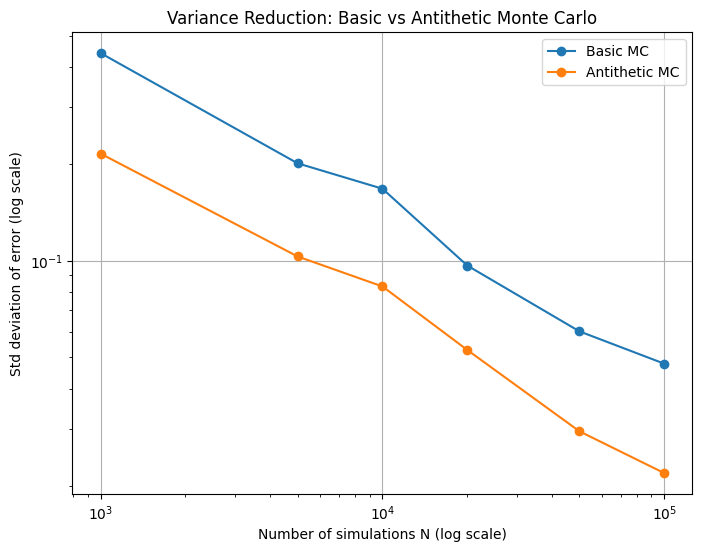

In [15]:
plt.figure(figsize=(8,6))

plt.plot(N_values, std_basic_list, marker='o', label='Basic MC')
plt.plot(N_values, std_anti_list, marker='o', label='Antithetic MC')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Number of simulations N (log scale)")
plt.ylabel("Std deviation of error (log scale)")
plt.title("Variance Reduction: Basic vs Antithetic Monte Carlo")
plt.grid(True)
plt.legend()

plt.show()
